### Code untuk di Jupyter notebook

In [3]:
%cd C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\preprocess-2

C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\preprocess-2


In [4]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 5232-3FDD

 Directory of C:\Users\Fadhlan\Pembelajaran Mesin\Dataset\preprocess-2

09/11/2021  07:57    <DIR>          .
09/11/2021  07:57    <DIR>          ..
09/11/2021  07:57    <DIR>          testing
09/11/2021  07:57    <DIR>          training
09/11/2021  07:57    <DIR>          validation
               0 File(s)              0 bytes
               5 Dir(s)  31.314.989.056 bytes free


In [5]:
import os
# path di jupyter
base_dataset = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/'
base_dataset_acral = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/acral melanoma/'
base_dataset_benign = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/benign nevi/'

print('Nama image acral melanoma: ',os.listdir(base_dataset_acral)[:1], ', Jumlah data :', len(os.listdir(base_dataset_acral)))
print('Nama image benign nevi: ',os.listdir(base_dataset_benign)[:1], ', Jumlah data :', len(os.listdir(base_dataset_benign)))

Nama image acral melanoma:  [] , Jumlah data : 0
Nama image benign nevi:  [] , Jumlah data : 0


In [6]:
# inisialisasi direktori data train dan validasi beserta data per kategori
dir1 = [r'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/acral melanoma/',
        r'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/validation/acral melanoma/',
        r'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/testing/acral melanoma/',
        r'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/benign nevi/',
        r'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/validation/benign nevi/',
       r'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/testing/benign nevi/']

# membuat folder baru dengan pengecekan eror jika direktori sudah dibuat
for i in range(len(dir1)):
    if not os.path.exists(dir1[i]):
        os.makedirs(dir1[i])

# inisialisasi direktori data train, validasi, dan test ke dalam variabel
train_dir = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/'
val_dir = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/validation/'
test_dir = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/testing/'

In [19]:
#sekali aja

import random
from tqdm.notebook import trange
from shutil import move

# fungsi untuk split data
def split_data(source_folder, dest_folder, split_ratio):

    if source_folder is not None and dest_folder is not None:
        if os.path.exists(source_folder) and os.path.exists(dest_folder):
            
            file_names = [f_name for f_name in os.listdir(source_folder)]
            shuffled_files = random.sample(file_names, len(file_names))

            for each_img in trange(round(len(shuffled_files)*split_ratio)):
                src_full_file_path = os.path.join(source_folder, shuffled_files[each_img])
                dst_full_path = os.path.join(dest_folder, shuffled_files[each_img])      
                
                move(src_full_file_path, dst_full_path)

category = ['acral melanoma', 'benign nevi']

for each_labels in category:    
    data_src = os.path.join(base_dataset, each_labels)
    data_dst_train = os.path.join(train_dir, each_labels)
    data_dst_val = os.path.join(val_dir, each_labels)
    data_dst_test = os.path.join(test_dir, each_labels)

    split_data(data_src, data_dst_train, 0.8)

    split_data(data_src, data_dst_val, 0.95)
    
    split_data(data_src, data_dst_test, 1)

  0%|          | 0/280 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [7]:
import glob
train_melanoma = len(list(glob.iglob("C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/acral melanoma/*.jpg*", recursive=True)))
print("Total Data Training Image    : ",train_melanoma," Image \n")
val_melanoma = len(list(glob.iglob("C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/validation/acral melanoma/*.jpg*", recursive=True)))
print("Total Data Validation Image    : ",val_melanoma," Image \n")
test_melanoma = len(list(glob.iglob("C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/testing/acral melanoma/*.jpg*", recursive=True)))
print("Total Data Validation Image    : ",test_melanoma," Image \n")

train_benign = len(list(glob.iglob("C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/benign nevi/*.jpg*", recursive=True)))
print("Total Data Training Image    : ",train_benign," Image \n")
val_benign = len(list(glob.iglob("C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/validation/benign nevi/*.jpg*", recursive=True)))
print("Total Data Validation Image    : ",val_benign," Image \n")
test_benign = len(list(glob.iglob("C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/testing/benign nevi/*.jpg*", recursive=True)))
print("Total Data Validation Image    : ",test_benign," Image \n")

Total Data Training Image    :  280  Image 

Total Data Validation Image    :  66  Image 

Total Data Validation Image    :  4  Image 

Total Data Training Image    :  299  Image 

Total Data Validation Image    :  71  Image 

Total Data Validation Image    :  4  Image 



In [24]:
import numpy as np
import cv2
def estimate_radius(img):
    mx = img[img.shape[0] // 2,:,:].sum(1)
    rx = (mx > mx.mean() / 20).sum() / 2
    my = img[:,img.shape[1] // 2,:].sum(1)
    ry = (my > my.mean() / 20).sum() / 2
    return (ry, rx)


def remove_outer_circle(a, p, r):
    b = np.zeros(a.shape, dtype=np.uint8)
    cv2.circle(b, (a.shape[1] // 2, a.shape[0] // 2), int(r * p), (1, 1, 1), -1, 8, 0)
    return a * b + 255 * (1 - b)

def crop_img(img, h, w):
        h_margin = (img.shape[0] - h) // 2 if img.shape[0] > h else 0
        w_margin = (img.shape[1] - w) // 2 if img.shape[1] > w else 0
        crop_img = img[h_margin:h + h_margin,w_margin:w + w_margin,:]
        return crop_img

def place_in_square(img, r, h, w):
    new_img = np.zeros((2 * r, 2 * r, 3), dtype=np.uint8)
    new_img += 255
    new_img[r - h // 2:r - h // 2 + img.shape[0], r - w // 2:r - w // 2 + img.shape[1]] = img
    return new_img

scale = 112
IMG_SIZE = 224

def preprocess_image_training(file):
    category = ''
    if 'AM' in file:
        category = 'acral melanoma'
    else:
        category = 'benign nevi'
    #input_filepath = os.path.join('./melanoma detection/training/{}/','{}.jpg'.format(category, file))
    input_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/training/{}/{}'.format(category, file)
    #output_filepath = os.path.join('./preprocess melanoma/training/{}/','{}.jpg'.format(category, file))
    output_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/training/{}/{}'.format(category, file)
    img = cv2.imread(input_filepath)
    ry, rx = estimate_radius(img)

    resize_scale = scale / max(rx, ry)
    w = min(int(rx * resize_scale * 2), scale * 2)
    h = min(int(ry * resize_scale * 2), scale * 2)

    img = cv2.resize(img, (0,0), fx=resize_scale, fy=resize_scale)

    img = crop_img(img, h, w)

    img = remove_outer_circle(img, 0.9, scale)
    img = place_in_square(img, scale, h, w)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

def preprocess_image_validation(file):
    category = ''
    if 'AM' in file:
        category = 'acral melanoma'
    else:
        category = 'benign nevi'
    #input_filepath = os.path.join('./melanoma detection/validation/{}/','{}.jpg'.format(category, file))
    input_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/validation/{}/{}'.format(category, file)
    #output_filepath = os.path.join('./preprocess melanoma/validation/{}/','{}.jpg'.format(category, file))
    output_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/validation/{}/{}'.format(category, file)

    img = cv2.imread(input_filepath)
    ry, rx = estimate_radius(img)

    resize_scale = scale / max(rx, ry)
    w = min(int(rx * resize_scale * 2), scale * 2)
    h = min(int(ry * resize_scale * 2), scale * 2)

    img = cv2.resize(img, (0,0), fx=resize_scale, fy=resize_scale)

    img = crop_img(img, h, w)

    img = remove_outer_circle(img, 0.9, scale)
    img = place_in_square(img, scale, h, w)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))
    
def preprocess_image_testing(file):
    category = ''
    if 'AM' in file:
        category = 'acral melanoma'
    else:
        category = 'benign nevi'
    #input_filepath = os.path.join('./melanoma detection/validation/{}/','{}.jpg'.format(category, file))
    input_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/melanoma detection/testing/{}/{}'.format(category, file)
    #output_filepath = os.path.join('./preprocess melanoma/validation/{}/','{}.jpg'.format(category, file))
    output_filepath = 'C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/testing/{}/{}'.format(category, file)

    img = cv2.imread(input_filepath)
    ry, rx = estimate_radius(img)

    resize_scale = scale / max(rx, ry)
    w = min(int(rx * resize_scale * 2), scale * 2)
    h = min(int(ry * resize_scale * 2), scale * 2)

    img = cv2.resize(img, (0,0), fx=resize_scale, fy=resize_scale)

    img = crop_img(img, h, w)

    img = remove_outer_circle(img, 0.9, scale)
    img = place_in_square(img, scale, h, w)
    cv2.imwrite(output_filepath, cv2.resize(img, (IMG_SIZE,IMG_SIZE)))

In [25]:
def multiprocess_image_processor1(process:int, imgs:list):
    print(f'MESSAGE: Running {process} process')
    ThreadPool(process).map(preprocess_image_training, imgs)
    print('Process Selesai')

def multiprocess_image_processor2(process:int, imgs:list):
    print(f'MESSAGE: Running {process} process')
    ThreadPool(process).map(preprocess_image_validation, imgs)
    print('Process Selesai')
    
def multiprocess_image_processor3(process:int, imgs:list):
    print(f'MESSAGE: Running {process} process')
    ThreadPool(process).map(preprocess_image_testing, imgs)
    print('Process Selesai')

In [26]:
import multiprocessing
from multiprocessing.pool import ThreadPool
print(multiprocessing.cpu_count()," CPU cores")

12  CPU cores


In [27]:
file_names_train_melanoma = [f_name for f_name in os.listdir(dir1[0])]
file_names_train_benign = [f_name for f_name in os.listdir(dir1[3])]
file_names_val_melanoma = [f_name for f_name in os.listdir(dir1[1])]
file_names_val_benign = [f_name for f_name in os.listdir(dir1[4])]
file_names_test_melanoma = [f_name for f_name in os.listdir(dir1[2])]
file_names_test_benign = [f_name for f_name in os.listdir(dir1[5])]

In [28]:
len(file_names_test_melanoma)

4

In [29]:
#train melanoma
multiprocess_image_processor1(12, file_names_train_melanoma)
#train benign
multiprocess_image_processor1(12, file_names_train_benign)

MESSAGE: Running 12 process
Process Selesai
MESSAGE: Running 12 process
Process Selesai


In [30]:
#val melanoma
multiprocess_image_processor2(12, file_names_val_melanoma)
#val benign
multiprocess_image_processor2(12, file_names_val_benign)

MESSAGE: Running 12 process
Process Selesai
MESSAGE: Running 12 process
Process Selesai


In [31]:
#test melanoma
multiprocess_image_processor3(12, file_names_test_melanoma)
#test benign
multiprocess_image_processor3(12, file_names_test_benign)

MESSAGE: Running 12 process
Process Selesai
MESSAGE: Running 12 process
Process Selesai


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1/255,
                    rotation_range=15,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    brightness_range = [0.2,0.5],
                    zoom_range = 0.2,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale=1/255)

test_datagen = ImageDataGenerator(
                    rescale=1/255)

In [34]:
batch_size=16
train_dataset = train_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/training/',
                                                 target_size=(224, 224),
                                                 class_mode='binary')

validation_dataset = val_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/validation/',
                                                 target_size=(224, 224),
                                                 class_mode='binary')
test_dataset = val_datagen.flow_from_directory(batch_size=batch_size,
                                                 directory='C:/Users/Fadhlan/Pembelajaran Mesin/Dataset/preprocess melanoma/testing/',
                                                 target_size=(224, 224),
                                                 class_mode='binary')

Found 579 images belonging to 2 classes.
Found 137 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [37]:
model_1 = Sequential()

model_1.add(InputLayer(input_shape=[224,224,3]))
model_1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='same'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='same'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='same'))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='same'))
model_1.add(BatchNormalization())

model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

In [38]:
model_1.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])
callback = EarlyStopping(
    monitor="val_acc",
    patience=100,
    verbose=1,
    restore_best_weights=True,
)
train_step_size = train_dataset.n // train_dataset.batch_size
val_step_size = validation_dataset.n // validation_dataset.batch_size
history_model_1 = model_1.fit(train_dataset, epochs = 100, steps_per_epoch = train_step_size, validation_steps = val_step_size ,validation_data=validation_dataset, callbacks=[callback])

Epoch 1/100
36/36 [==============================] - 13s 195ms/step - loss: 1.3448 - acc: 0.6270 - val_loss: 1.4487 - val_acc: 0.5312
Epoch 2/100
36/36 [==============================] - 7s 181ms/step - loss: 0.6647 - acc: 0.6732 - val_loss: 1.8352 - val_acc: 0.5234
Epoch 3/100
36/36 [==============================] - 7s 180ms/step - loss: 0.6656 - acc: 0.6625 - val_loss: 2.7692 - val_acc: 0.5156
Epoch 4/100
36/36 [==============================] - 7s 182ms/step - loss: 0.5685 - acc: 0.6732 - val_loss: 5.5234 - val_acc: 0.5156
Epoch 5/100
36/36 [==============================] - 7s 189ms/step - loss: 0.5793 - acc: 0.7123 - val_loss: 5.3046 - val_acc: 0.5078
Epoch 6/100
36/36 [==============================] - 7s 185ms/step - loss: 0.6148 - acc: 0.6359 - val_loss: 0.7358 - val_acc: 0.5156
Epoch 7/100
36/36 [==============================] - 7s 181ms/step - loss: 0.4703 - acc: 0.7229 - val_loss: 3.2176 - val_acc: 0.5234
Epoch 8/100
36/36 [==============================] - 7s 180ms/step -

36/36 [==============================] - 7s 184ms/step - loss: 0.2445 - acc: 0.9076 - val_loss: 0.7721 - val_acc: 0.7031
Epoch 62/100
36/36 [==============================] - 7s 184ms/step - loss: 0.2335 - acc: 0.8988 - val_loss: 0.8003 - val_acc: 0.6406
Epoch 63/100
36/36 [==============================] - 7s 185ms/step - loss: 0.2076 - acc: 0.9041 - val_loss: 1.0007 - val_acc: 0.6328
Epoch 64/100
36/36 [==============================] - 7s 188ms/step - loss: 0.1957 - acc: 0.9183 - val_loss: 0.8565 - val_acc: 0.7578
Epoch 65/100
36/36 [==============================] - 7s 186ms/step - loss: 0.2749 - acc: 0.8739 - val_loss: 0.4120 - val_acc: 0.8438
Epoch 66/100
36/36 [==============================] - 7s 189ms/step - loss: 0.2619 - acc: 0.8810 - val_loss: 0.5591 - val_acc: 0.6250
Epoch 67/100
36/36 [==============================] - 7s 196ms/step - loss: 0.2506 - acc: 0.8917 - val_loss: 0.3579 - val_acc: 0.8438
Epoch 68/100
36/36 [==============================] - 8s 213ms/step - loss:

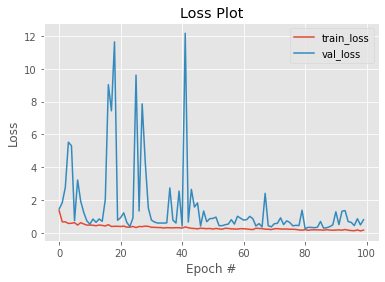

In [39]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history_model_1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

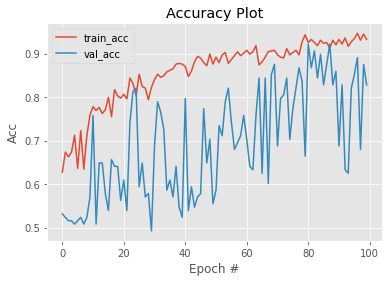

In [40]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history_model_1.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [41]:
result_train = model_1.evaluate(train_dataset, verbose=1)
print('\n', 'Hasil Akurasi Train:-', result_train[1]," Hasil Loss Train", result_train[0])
result_val = model_1.evaluate(validation_dataset, verbose=1)
print('\n', 'Hasil Akurasi Val:-', result_val[1]," Hasil Loss Val", result_val[0])
result_test = model_1.evaluate(test_dataset, verbose=1)
print('\n', 'Hasil Akurasi Test:-', result_test[1]," Hasil Loss Test", result_test[0])

37/37 [==============================] - 7s 187ms/step - loss: 0.2764 - acc: 0.8946 5s -

 Hasil Akurasi Train:- 0.8946459293365479  Hasil Loss Train 0.27639442682266235
9/9 [==============================] - 1s 87ms/step - loss: 0.7535 - acc: 0.8321

 Hasil Akurasi Val:- 0.8321167826652527  Hasil Loss Val 0.7535160183906555
1/1 [==============================] - 0s 487ms/step - loss: 1.0227 - acc: 0.8750

 Hasil Akurasi Test:- 0.875  Hasil Loss Test 1.0226800441741943


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true_test = test_dataset.classes
y_pred = np.round(model_1.predict(test_dataset),0)
y_pred=np.argmax(y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_true_test, y_pred))

Confusion Matrix
[[4 0]
 [4 0]]


In [43]:
print('Classification Report')

target_names = ['acral melanoma', 'benign nevi']
print(classification_report(y_true_test, y_pred, target_names=target_names, zero_division=1))

Classification Report
                precision    recall  f1-score   support

acral melanoma       0.50      1.00      0.67         4
   benign nevi       1.00      0.00      0.00         4

      accuracy                           0.50         8
     macro avg       0.75      0.50      0.33         8
  weighted avg       0.75      0.50      0.33         8



In [44]:
model_1.save('model-preprocess-1.h5')

### MODEL 2

In [45]:
model_2 = Sequential()

model_2.add(InputLayer(input_shape=[224,224,3]))
model_2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(BatchNormalization())

model_2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model_2.add(MaxPool2D(pool_size=2, padding='same'))
model_2.add(BatchNormalization())

model_2.add(Flatten())
model_2.add(Dropout(0.2))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 32)       

In [46]:
model_2.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])
callback = EarlyStopping(
    monitor="val_acc",
    patience=100,
    verbose=1,
    restore_best_weights=True,
)
train_step_size = train_dataset.n // train_dataset.batch_size
val_step_size = validation_dataset.n // validation_dataset.batch_size
history_model_2 = model_2.fit(train_dataset, epochs = 100, steps_per_epoch = train_step_size, validation_steps = val_step_size,validation_data=validation_dataset, callbacks = [callback])

Epoch 1/100
36/36 [==============================] - 10s 231ms/step - loss: 1.2423 - acc: 0.6732 - val_loss: 0.7149 - val_acc: 0.5234
Epoch 2/100
36/36 [==============================] - 10s 263ms/step - loss: 0.5663 - acc: 0.7620 - val_loss: 0.8612 - val_acc: 0.5078
Epoch 3/100
36/36 [==============================] - 7s 198ms/step - loss: 0.5482 - acc: 0.7460 - val_loss: 1.0922 - val_acc: 0.5156
Epoch 4/100
36/36 [==============================] - 7s 198ms/step - loss: 0.4955 - acc: 0.7638 - val_loss: 1.4997 - val_acc: 0.5078
Epoch 5/100
36/36 [==============================] - 7s 195ms/step - loss: 0.4733 - acc: 0.7940 - val_loss: 2.1634 - val_acc: 0.5000- ac
Epoch 6/100
36/36 [==============================] - 7s 193ms/step - loss: 0.4442 - acc: 0.7940 - val_loss: 2.0676 - val_acc: 0.5234
Epoch 7/100
36/36 [==============================] - 7s 192ms/step - loss: 0.4432 - acc: 0.8028 - val_loss: 2.1610 - val_acc: 0.5078
Epoch 8/100
36/36 [==============================] - 7s 190ms/s

36/36 [==============================] - 7s 201ms/step - loss: 0.1331 - acc: 0.9556 - val_loss: 0.8344 - val_acc: 0.7891
Epoch 61/100
36/36 [==============================] - 7s 202ms/step - loss: 0.1462 - acc: 0.9414 - val_loss: 2.1017 - val_acc: 0.6406
Epoch 62/100
36/36 [==============================] - 7s 201ms/step - loss: 0.1002 - acc: 0.9574 - val_loss: 1.4033 - val_acc: 0.7422: 4s - loss: 0.0846  - ETA: 1s - loss: 0.0919 - a
Epoch 63/100
36/36 [==============================] - 7s 205ms/step - loss: 0.1416 - acc: 0.9396 - val_loss: 5.5377 - val_acc: 0.6172
Epoch 64/100
36/36 [==============================] - 7s 198ms/step - loss: 0.1092 - acc: 0.9627 - val_loss: 3.0847 - val_acc: 0.6641 3s - loss: 
Epoch 65/100
36/36 [==============================] - 7s 205ms/step - loss: 0.1384 - acc: 0.9375 - val_loss: 1.0271 - val_acc: 0.7812
Epoch 66/100
36/36 [==============================] - 7s 202ms/step - loss: 0.0833 - acc: 0.9645 - val_loss: 1.6874 - val_acc: 0.7500 0.964
Epoch 67

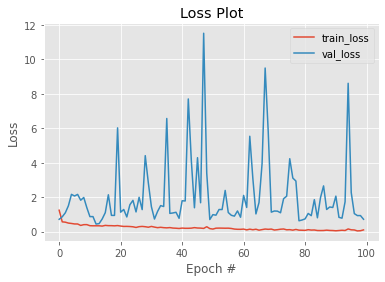

In [47]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history_model_2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

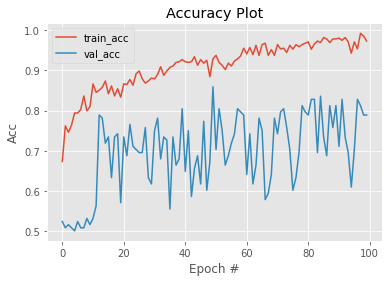

In [48]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 100), history_model_2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history_model_2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [49]:
result_train = model_2.evaluate(train_dataset, verbose=1)
print('\n', 'Hasil Akurasi Train:-', result_train[1]," Hasil Loss Train", result_train[0])
result_val = model_2.evaluate(validation_dataset, verbose=1)
print('\n', 'Hasil Akurasi Val:-', result_val[1]," Hasil Loss Val", result_val[0])
result_test = model_2.evaluate(test_dataset, verbose=1)
print('\n', 'Hasil Akurasi Test:-', result_test[1]," Hasil Loss Test", result_test[0])

37/37 [==============================] - 7s 191ms/step - loss: 0.0503 - acc: 0.9879 5s 

 Hasil Akurasi Train:- 0.9879102110862732  Hasil Loss Train 0.0503256618976593
9/9 [==============================] - 1s 104ms/step - loss: 0.7274 - acc: 0.7956

 Hasil Akurasi Val:- 0.7956204414367676  Hasil Loss Val 0.7273607850074768
1/1 [==============================] - 1s 577ms/step - loss: 0.0673 - acc: 1.0000

 Hasil Akurasi Test:- 1.0  Hasil Loss Test 0.06733912229537964


In [50]:
y_true_test = test_dataset.classes
y_pred = np.round(model_2.predict(test_dataset),0)
y_pred=np.argmax(y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_true_test, y_pred))

Confusion Matrix
[[4 0]
 [4 0]]


In [51]:
print('Classification Report')

target_names = ['acral melanoma', 'benign nevi']
print(classification_report(y_true_test, y_pred, target_names=target_names, zero_division=1))

Classification Report
                precision    recall  f1-score   support

acral melanoma       0.50      1.00      0.67         4
   benign nevi       1.00      0.00      0.00         4

      accuracy                           0.50         8
     macro avg       0.75      0.50      0.33         8
  weighted avg       0.75      0.50      0.33         8



In [52]:
model_2.save('model-preprocess-2.h5')

In [43]:
%cd C:\Users\Fadhlan\Pembelajaran Mesin

C:\Users\Fadhlan\Pembelajaran Mesin


In [53]:
from tensorflow.keras.layers import BatchNormalization
model_3 = Sequential()

model_3.add(InputLayer(input_shape=[224,224,3]))

model_3.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model_3.add(MaxPool2D(pool_size=2, padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model_3.add(MaxPool2D(pool_size=2, padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model_3.add(MaxPool2D(pool_size=2, padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model_3.add(MaxPool2D(pool_size=2, padding='same'))
model_3.add(BatchNormalization())

model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='sigmoid'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 128)     3584      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 56, 56, 128)       512       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 56, 56, 256)      

In [55]:
model_3.compile(optimizer=Adam(learning_rate=0.00146), 
              loss='binary_crossentropy', 
              metrics=['acc'])
callback = EarlyStopping(
    monitor="val_acc",
    patience=100,
    verbose=1,
    restore_best_weights=True,
)
train_step_size = train_dataset.n // train_dataset.batch_size
val_step_size = validation_dataset.n // validation_dataset.batch_size
history_model_3 = model_3.fit(train_dataset, epochs = 125, steps_per_epoch = train_step_size, validation_steps = val_step_size ,validation_data=validation_dataset, callbacks=[callback])

Epoch 1/125
36/36 [==============================] - 8s 194ms/step - loss: 2.4330 - acc: 0.6217 - val_loss: 41.9407 - val_acc: 0.4745
Epoch 2/125
36/36 [==============================] - 7s 193ms/step - loss: 1.0175 - acc: 0.5737 - val_loss: 0.7088 - val_acc: 0.5693
Epoch 3/125
36/36 [==============================] - 7s 197ms/step - loss: 0.8822 - acc: 0.6501 - val_loss: 0.8312 - val_acc: 0.5620
Epoch 4/125
36/36 [==============================] - 7s 194ms/step - loss: 1.0443 - acc: 0.6909 - val_loss: 3.7725 - val_acc: 0.6496
Epoch 5/125
36/36 [==============================] - 7s 198ms/step - loss: 0.6782 - acc: 0.6430 - val_loss: 0.8252 - val_acc: 0.7007
Epoch 6/125
36/36 [==============================] - 7s 194ms/step - loss: 0.8042 - acc: 0.5808 - val_loss: 5.9888 - val_acc: 0.5255
Epoch 7/125
36/36 [==============================] - 7s 201ms/step - loss: 0.8511 - acc: 0.6696 - val_loss: 0.7118 - val_acc: 0.5109
Epoch 8/125
36/36 [==============================] - 8s 210ms/step -

36/36 [==============================] - 8s 216ms/step - loss: 0.5050 - acc: 0.7513 - val_loss: 22.3079 - val_acc: 0.5985
Epoch 61/125
36/36 [==============================] - 8s 214ms/step - loss: 0.4761 - acc: 0.7709 - val_loss: 0.9493 - val_acc: 0.7299
Epoch 62/125
36/36 [==============================] - 8s 217ms/step - loss: 0.4980 - acc: 0.7744 - val_loss: 1.3113 - val_acc: 0.5620 - loss: 0.5111 - 
Epoch 63/125
36/36 [==============================] - 8s 215ms/step - loss: 0.4982 - acc: 0.7904 - val_loss: 4.0084 - val_acc: 0.5766
Epoch 64/125
36/36 [==============================] - 8s 219ms/step - loss: 0.4496 - acc: 0.7940 - val_loss: 1.3674 - val_acc: 0.6423
Epoch 65/125
36/36 [==============================] - 8s 212ms/step - loss: 0.4814 - acc: 0.7602 - val_loss: 1.7576 - val_acc: 0.5401
Epoch 66/125
36/36 [==============================] - 8s 223ms/step - loss: 0.4646 - acc: 0.7780 - val_loss: 0.8026 - val_acc: 0.6788
Epoch 67/125
36/36 [==============================] - 8s

36/36 [==============================] - 8s 221ms/step - loss: 0.3630 - acc: 0.8419 - val_loss: 0.7074 - val_acc: 0.6788
Epoch 121/125
36/36 [==============================] - 8s 218ms/step - loss: 0.3724 - acc: 0.8224 - val_loss: 2.5160 - val_acc: 0.6204- acc: 0
Epoch 122/125
36/36 [==============================] - 8s 220ms/step - loss: 0.3474 - acc: 0.8437 - val_loss: 19.8329 - val_acc: 0.6715cc: 0
Epoch 123/125
36/36 [==============================] - 8s 218ms/step - loss: 0.4831 - acc: 0.7300 - val_loss: 0.9579 - val_acc: 0.5766
Epoch 124/125
36/36 [==============================] - 8s 222ms/step - loss: 0.3543 - acc: 0.8419 - val_loss: 22.4655 - val_acc: 0.54740.3571 - acc: 0.
Epoch 125/125
36/36 [==============================] - 8s 221ms/step - loss: 0.4126 - acc: 0.8242 - val_loss: 0.6110 - val_acc: 0.7956


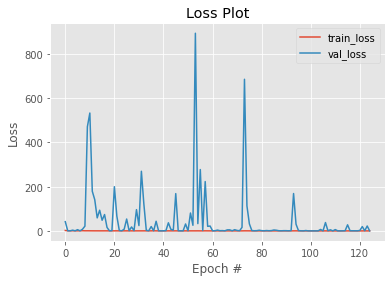

In [56]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 125), history_model_3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 125), history_model_3.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

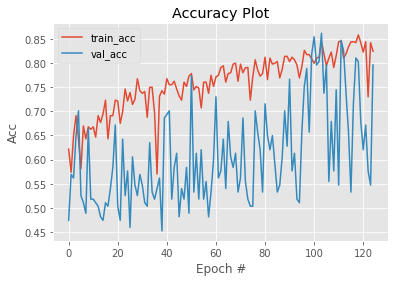

In [57]:
plt.style.use("ggplot")
plt.plot(np.arange(0, 125), history_model_3.history["acc"], label="train_acc")
plt.plot(np.arange(0, 125), history_model_3.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [58]:
result_train = model_3.evaluate(train_dataset, verbose=1)
print('\n', 'Hasil Akurasi Train:-', result_train[1]," Hasil Loss Train", result_train[0])
result_val = model_3.evaluate(validation_dataset, verbose=1)
print('\n', 'Hasil Akurasi Val:-', result_val[1]," Hasil Loss Val", result_val[0])
result_test = model_3.evaluate(test_dataset, verbose=1)
print('\n', 'Hasil Akurasi Test:-', result_test[1]," Hasil Loss Test", result_test[0])

37/37 [==============================] - 7s 198ms/step - loss: 0.3524 - acc: 0.8377

 Hasil Akurasi Train:- 0.8376511335372925  Hasil Loss Train 0.3524477779865265
9/9 [==============================] - 0s 44ms/step - loss: 0.6110 - acc: 0.7956

 Hasil Akurasi Val:- 0.7956204414367676  Hasil Loss Val 0.6110283136367798
1/1 [==============================] - 1s 938ms/step - loss: 0.6929 - acc: 0.7500

 Hasil Akurasi Test:- 0.75  Hasil Loss Test 0.6928976774215698


In [59]:
y_true_test = test_dataset.classes
y_pred = np.round(model_3.predict(test_dataset),0)
y_pred=np.argmax(y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_true_test, y_pred))

Confusion Matrix
[[4 0]
 [4 0]]


In [60]:
print('Classification Report')

target_names = ['acral melanoma', 'benign nevi']
print(classification_report(y_true_test, y_pred, target_names=target_names, zero_division=1))

Classification Report
                precision    recall  f1-score   support

acral melanoma       0.50      1.00      0.67         4
   benign nevi       1.00      0.00      0.00         4

      accuracy                           0.50         8
     macro avg       0.75      0.50      0.33         8
  weighted avg       0.75      0.50      0.33         8



In [62]:
model_3.save('model-preprocess-3.h5')